In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import gc
import re

from tqdm import tqdm

cmap = plt.get_cmap('inferno')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cmap(np.linspace(0, 1, 11)))
markers = ['o', 's', 'D', '^', 'v', 'P', 'X', '*', '+', 'H']

#plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=17)
plt.rc('lines', markersize=6)
plt.rc('lines', linewidth=2)
plt.rc('legend', loc='best')
plt.rc('legend', fontsize=8)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('font', family='serif')

In [54]:
#path = r'C:\Users\55859\Datas\Collagen_fibril_zurik_ext'
path = '/home/robert/Datas/Collagen_fibril_zurik/'

DF = {}

for fn in tqdm(os.listdir(path)):
    if not fn.endswith('.dat'):
        continue    
    
    file_path = os.path.join(path, fn)
    #print(file_path)

    # Define a regular expression pattern to match "ts_" followed by one or more digits
    pattern = r'ts_(\d+)'

    # Use re.findall() to find all matches in the file path
    numbers_after_ts = [match for match in re.findall(pattern, file_path)]

    ts = int(numbers_after_ts[0])

    df = pd.read_csv(file_path, sep = ' ')
    # Definindo os nomes das colunas
    df.columns = ['i' , 'uid', 'x', 'y', 'z']
    df['file_path'] = fn


    if ts in DF.keys():
        DF[ts].append(df)
    else:
        DF[ts] = [df]

    del df  # Descarte o DataFrame original
    gc.collect()  # Forçar a coleta de lixo


100%|██████████| 549/549 [01:51<00:00,  4.92it/s]


In [55]:
DF

{128: [          i    uid  x     y   z                                  file_path
  0      uid:      1  0     7  -1  dla_mode_s_ts_128_nb_30000_seed_3850_.dat
  1      uid:      2  1     3  -1  dla_mode_s_ts_128_nb_30000_seed_3850_.dat
  2      uid:      3 -1    23  -1  dla_mode_s_ts_128_nb_30000_seed_3850_.dat
  3      uid:      4 -1    23   0  dla_mode_s_ts_128_nb_30000_seed_3850_.dat
  4      uid:      5  0     7  -2  dla_mode_s_ts_128_nb_30000_seed_3850_.dat
  ...     ...    ... ..   ...  ..                                        ...
  29995  uid:  29996 -5   -65 -10  dla_mode_s_ts_128_nb_30000_seed_3850_.dat
  29996  uid:  29997  6 -1673   4  dla_mode_s_ts_128_nb_30000_seed_3850_.dat
  29997  uid:  29998 -5 -1369  -1  dla_mode_s_ts_128_nb_30000_seed_3850_.dat
  29998  uid:  29999  4 -1121  10  dla_mode_s_ts_128_nb_30000_seed_3850_.dat
  29999  uid:  30000 -8   415  -6  dla_mode_s_ts_128_nb_30000_seed_3850_.dat
  
  [30000 rows x 6 columns],
            i    uid   x     y   z      

In [16]:
type(DF[512])

list

In [51]:
import pandas as pd


# Para armazenar os resultados finais
resultados = {}

for ts, lista_dfs in DF.items():
    contagens_camadas = []

    for df in lista_dfs:
        # Agrupar por 'y' e contar as partículas em cada grupo
        contagem_por_camada = df.groupby('y').size()
        contagens_camadas.append(contagem_por_camada)

    # Concatenar todas as contagens de camadas para calcular a média
    todas_contagens = pd.concat(contagens_camadas, axis=1)

    # Calcular a média ao longo das colunas para obter a média de partículas por camada 'y'
    media_particulas_por_camada = todas_contagens.mean(axis=1).astype(int)

    # Armazenar a média calculada no dicionário de resultados com o timestamp correspondente
    resultados[ts] = media_particulas_por_camada

# Exibir os resultados
for ts, medias in resultados.items():
    print(f"Timestamp: {ts}")
    for y, media in medias.items():
        print(f"Camada Y: {y}, Média de Partículas: {media}")


KeyError: 'y'

In [40]:
resultados[2]

y
-2045    2
-2044    2
-2043    2
-2042    2
-2041    2
        ..
-2050    3
-2049    4
-2048    4
-2047    2
-2046    2
Length: 4226, dtype: int64

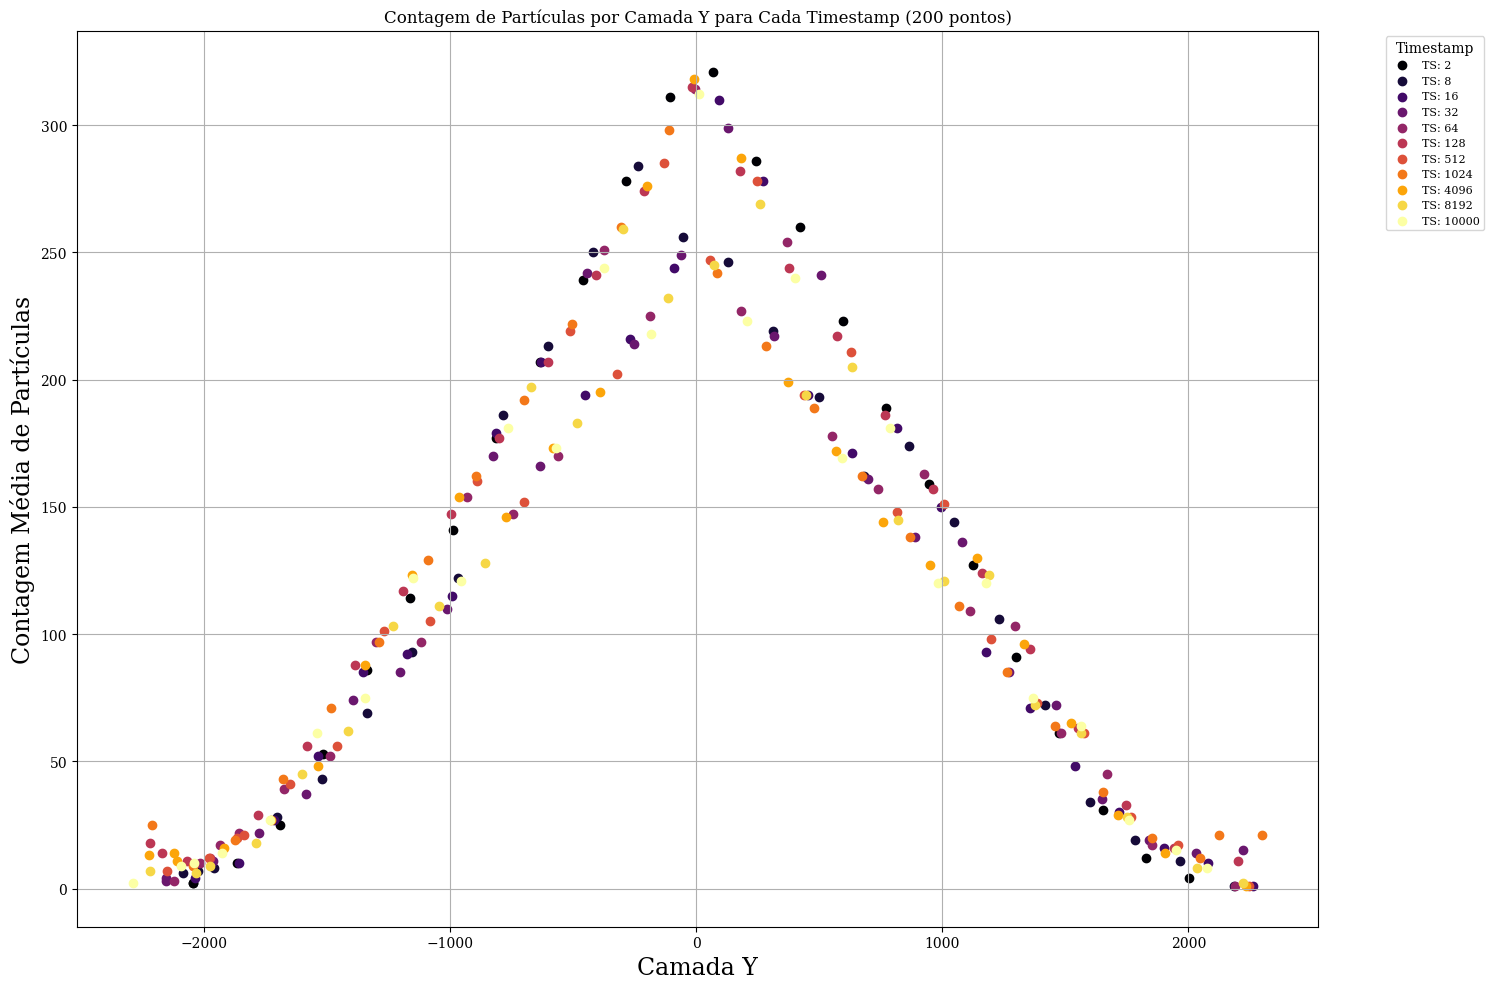

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Configuração inicial da plotagem
plt.figure(figsize=(15, 10))

# Número máximo de pontos a serem plotados por timestamp
max_pontos = 25

# Ordenar os timestamps antes de plotar
timestamps_ordenados = sorted(resultados.keys())

# Iterar sobre cada timestamp ordenado em 'resultados'
for ts in timestamps_ordenados:
    medias = resultados[ts]
    
    # Converter a Series pandas para um DataFrame para facilitar o manuseio
    df_medias = medias.reset_index()
    
    # Verificar se o número de pontos excede 'max_pontos' e realizar a amostragem se necessário
    if len(df_medias) > max_pontos:
        # Gerar índices para amostragem uniforme ao longo do DataFrame
        indices_amostrados = np.linspace(0, len(df_medias) - 1, max_pontos, dtype=int)
        
        # Usar os índices amostrados para selecionar as linhas correspondentes no DataFrame
        df_amostrado = df_medias.iloc[indices_amostrados]
    else:
        df_amostrado = df_medias

    # Extrair as camadas 'y' e as contagens correspondentes do DataFrame amostrado
    y_camadas_amostradas = df_amostrado.iloc[:, 0].values  # Supondo que 'y' esteja na primeira coluna
    contagens_amostradas = df_amostrado.iloc[:, 1].values  # Supondo que as contagens estejam na segunda coluna

    # Plotar a contagem de partículas por camada 'y' amostrada
    plt.scatter(y_camadas_amostradas, contagens_amostradas, marker='o', linestyle='-', label=f'TS: {ts}')

# Ajustes finais do gráfico
plt.title('Contagem de Partículas por Camada Y para Cada Timestamp (200 pontos)')
plt.xlabel('Camada Y')
plt.ylabel('Contagem Média de Partículas')
plt.legend(title='Timestamp', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Ajustar o layout para acomodar a legenda
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [4]:
length = {}
for ts in sorted(DF.keys()):
    for df in DF[ts]:
        l = df['y'].max() - df['y'].min()
        
        if ts in length.keys():
            length[ts].append(l)
        else:
            length[ts] = [l]

In [12]:
length

{2: [3829,
  3761,
  3945,
  3665,
  3441,
  3517,
  3537,
  3985,
  3697,
  3729,
  3637,
  3525,
  3601,
  3341,
  3397,
  3561,
  3729,
  3641,
  3537,
  3573,
  3645,
  3617,
  3473,
  3797,
  3341,
  3765,
  3885,
  3609,
  3633,
  3841,
  3737,
  3801,
  3689,
  3833,
  3769,
  3761,
  3821,
  3601,
  3945,
  3569,
  3565,
  3581,
  3873,
  3697,
  3689,
  3629,
  3701,
  3561,
  3541,
  3801],
 8: [3733,
  3685,
  3589,
  3737,
  3737,
  3729,
  3589,
  3897,
  3669,
  3673,
  3713,
  3765,
  3737,
  3577,
  3597,
  3709,
  3881,
  3849,
  3645,
  3541,
  3649,
  3865,
  3689,
  3753,
  3873,
  3581,
  3585,
  3457,
  3757,
  3569,
  3909,
  3773,
  3561,
  3653,
  3821,
  3565,
  3913,
  3629,
  3733,
  3869,
  3537,
  3761,
  3621,
  3573,
  3537,
  3557,
  3673,
  3577,
  3745,
  3921],
 16: [3613,
  3605,
  3809,
  3969,
  3773,
  3981,
  3693,
  3665,
  3733,
  3941,
  3693,
  3805,
  3753,
  3693,
  3761,
  3689,
  3701,
  3857,
  3713,
  3757,
  3913,
  3905,
  3689,
  38

In [17]:
type(length[2])

list

Text(0.5, 0, '$T_{s}$')

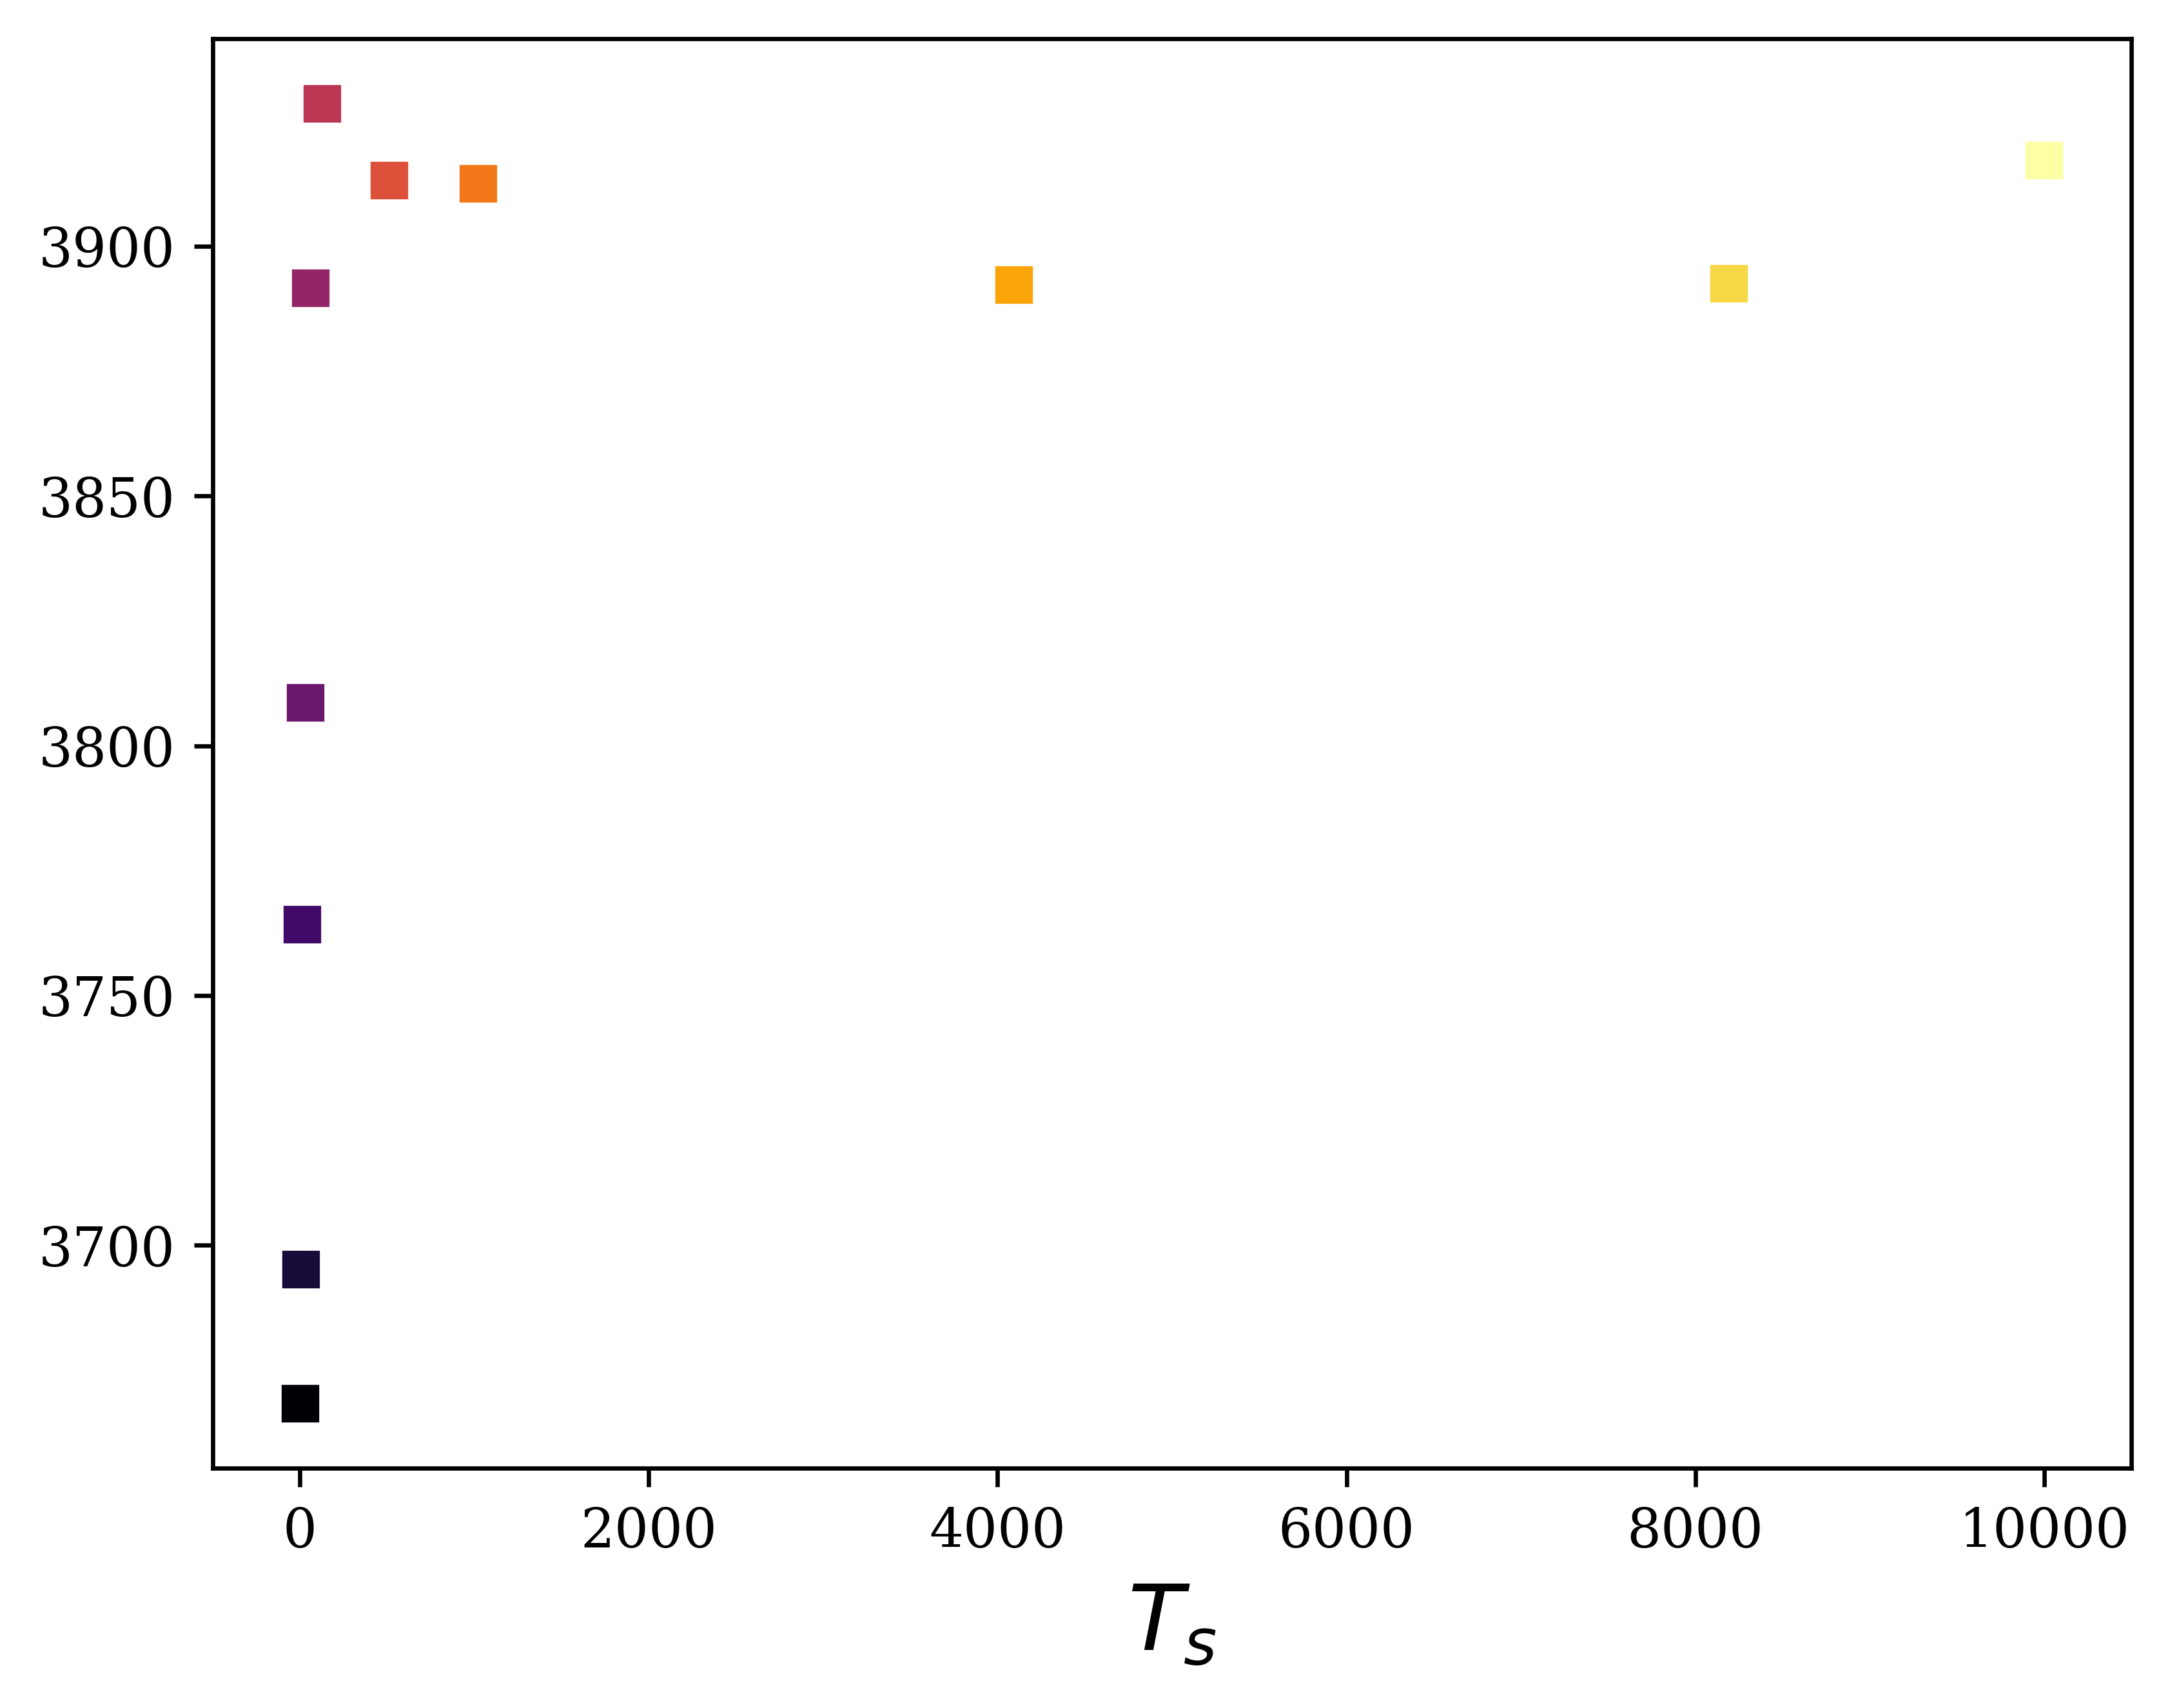

In [5]:
i = 0
plt.figure(dpi = 600)
ts = []
ml = []
for key, l in length.items():
    media=sum(l) / len(l) if len(l) > 0 else 0
    ts.append(key)
    ml.append(media)
    plt.plot(key,media,'s--')
    i+=1

plt.xlabel(r'$T_{s}$')m

In [11]:
ml


[3668.36,
 3695.16,
 3764.265306122449,
 3808.68,
 3891.56,
 3928.6,
 3913.24,
 3912.52,
 3892.28,
 3892.52,
 3917.16]

In [ ]:
L = [3668, 3695, 3764, 3808, 3891, 3928, 3913, 3912, 3892, 3892, 3917]

In [6]:
x = np.array(ts)
y = np.array(ml)

In [7]:
np.mean(ml[6:11])

3905.5440000000003

In [14]:
x1 = np.linspace(-150, 10150,len(x))
y1 = np.ones(len(x1))*np.mean(ml[6:11])


(-150.0, 10150.0)

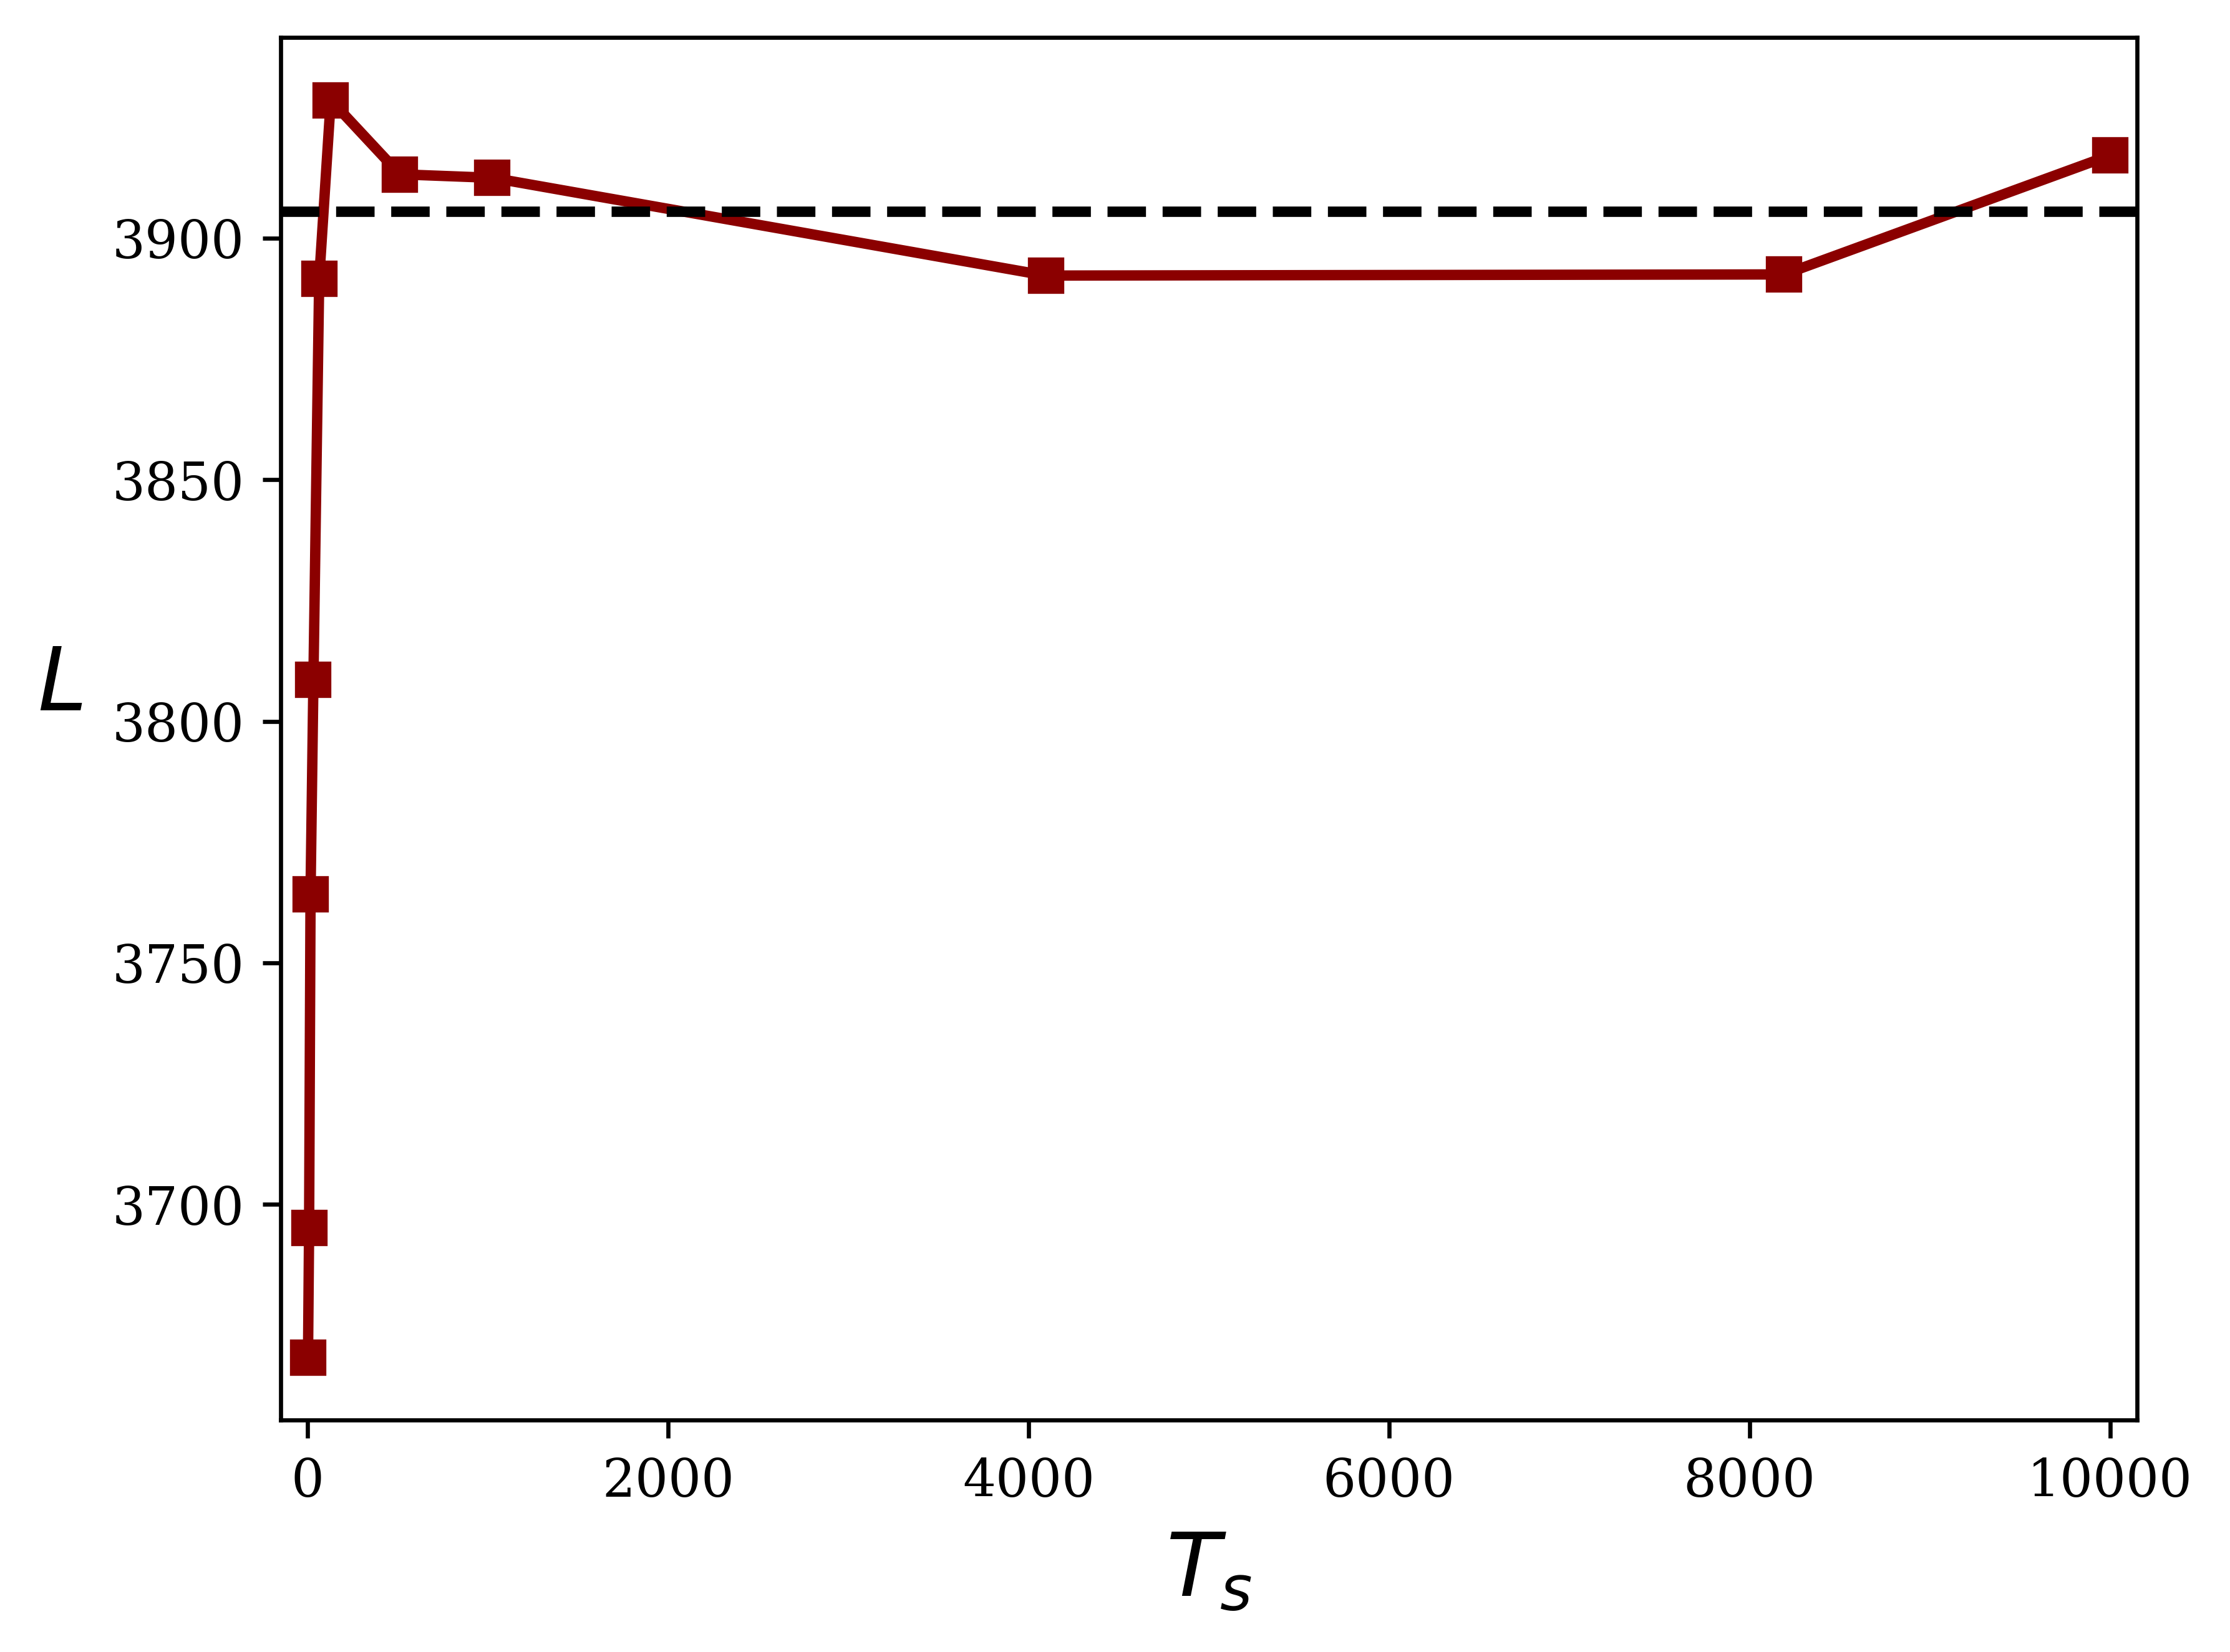

In [16]:
plt.figure
plt.figure(dpi = 600)
plt.plot(x,y,'s-', color = 'darkred')
plt.plot(x1,y1,'--k')
plt.xlabel(r'$T_{s}$')
plt.ylabel(r'$L$', rotation = 0,labelpad=10)
plt.xlim(-150,10150)

In [6]:
x = np.array(ts)
y = np.array(ml)

Text(0, 0.5, '$L$')

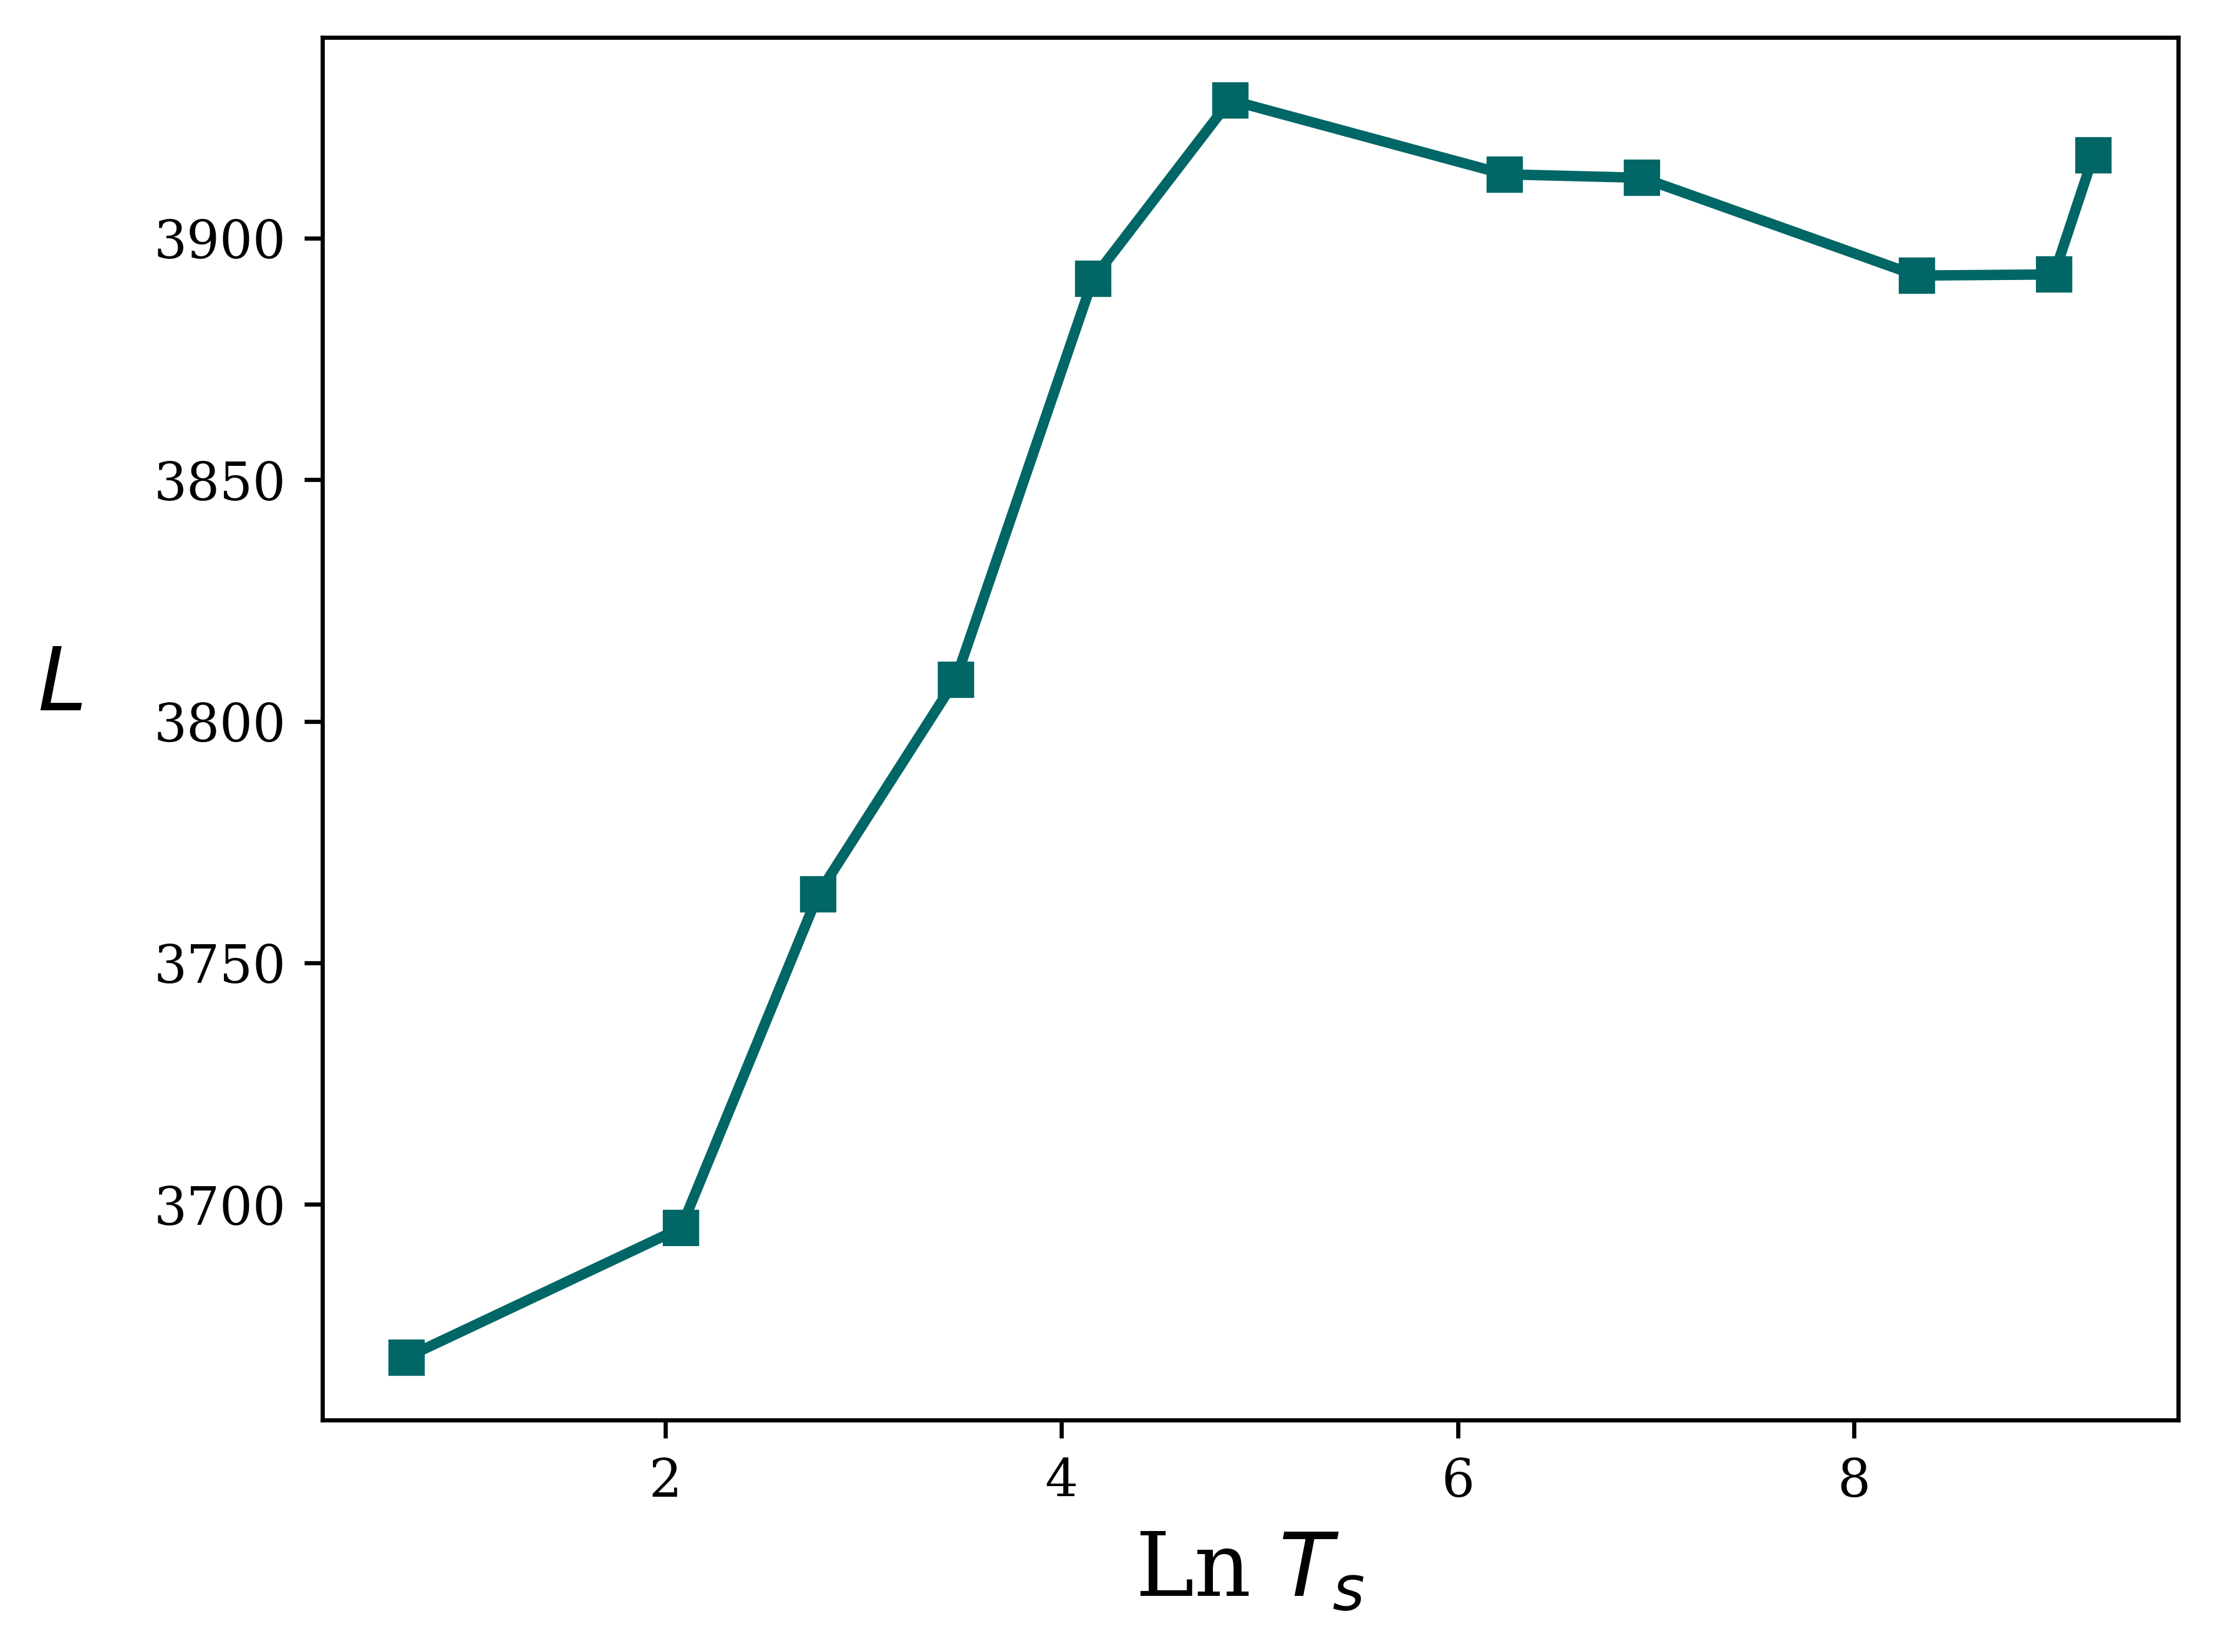

In [9]:
plt.figure(dpi = 600)
plt.plot(np.log(x),(y), 's-', color = '#006666')
plt.xlabel(r'Ln $T_{s}$')
plt.ylabel(r'$L$', rotation = 0,labelpad=18)